In [1]:
import torch
from Nets import Net, NetNoise
from functions import test, train, save_pruned_model
from dataloaders import MNIST, dead_leaves_squares_pretraining_gray
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

torch.cuda.is_available()
device = 'cuda'

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


-------------------------------------------------- pretraining --------------------------------------------------
Loading data from data/dead_leaves-squares/ as imagefolder
Epoch 1 [0 / 105000]       loss: 4.647898197174072
Epoch 1 [12800 / 105000]       loss: 4.662369728088379
Epoch 1 [25600 / 105000]       loss: 4.655643939971924
Epoch 1 [38400 / 105000]       loss: 4.653311252593994
Epoch 1 [51200 / 105000]       loss: 4.647488594055176
Epoch 1 [64000 / 105000]       loss: 4.661376476287842
Epoch 1 [76800 / 105000]       loss: 4.656686782836914
Epoch 1 [89600 / 105000]       loss: 4.6593780517578125
Epoch 1 [102400 / 105000]       loss: 4.6533894538879395
-------------------------------------------------- training only last layer --------------------------------------------------
Epoch 1 [0 / 50000]       loss: 2.3397626876831055
Epoch 1 [6400 / 50000]       loss: 0.6342592835426331
Epoch 1 [12800 / 50000]       loss: 0.4375220835208893
Epoch 1 [19200 / 50000]       loss: 0.47031387

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1144, Accuracy: 9627/10000 (96%)



tensor(96.2700)

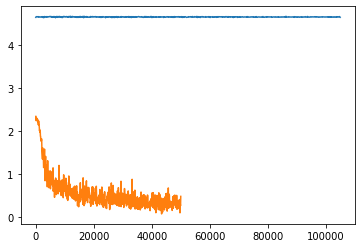

In [3]:
print('-'*50, 'pretraining', '-'*50)
train_loader_random_lebels = dead_leaves_squares_pretraining_gray()

model = Net(105)
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses, val_losses, exemplers = train(model, optimizer, train_loader_random_lebels)
plt.plot(exemplers, train_losses)

save_pruned_model(model, "pretrained_dead_leaves_squares_gray_withoutlast.pt")

newModel = Net(10)
optimizer = optim.SGD(newModel.parameters(), lr=0.1)
newModel.load_state_dict(torch.load("pretrained_dead_leaves_squares_gray_withoutlast.pt"), strict=False)

print('-'*50, 'training only last layer', '-'*50)
train_loader, val_loader, test_loader = MNIST()

train_losses, val_losses, exemplers = train(newModel, optimizer, train_loader)
plt.plot(exemplers, train_losses)
test(newModel, test_loader)

-------------------------------------------------- pretraining --------------------------------------------------
Loading data from data/dead_leaves-squares/ as imagefolder
Epoch 1 [0 / 105000]       loss: 4.663735866546631
Epoch 1 [12800 / 105000]       loss: 4.6532883644104
Epoch 1 [25600 / 105000]       loss: 4.651196002960205
Epoch 1 [38400 / 105000]       loss: 4.652601718902588
Epoch 1 [51200 / 105000]       loss: 4.648440361022949
Epoch 1 [64000 / 105000]       loss: 4.649972438812256
Epoch 1 [76800 / 105000]       loss: 4.655980110168457
Epoch 1 [89600 / 105000]       loss: 4.657352924346924
Epoch 1 [102400 / 105000]       loss: 4.658249855041504
-------------------------------------------------- training only last layer --------------------------------------------------
Epoch 1 [0 / 50000]       loss: 2.236365556716919
Epoch 1 [6400 / 50000]       loss: 2.2201805114746094
Epoch 1 [12800 / 50000]       loss: 2.1824119091033936
Epoch 1 [19200 / 50000]       loss: 2.1963047981262

tensor(53.2900)

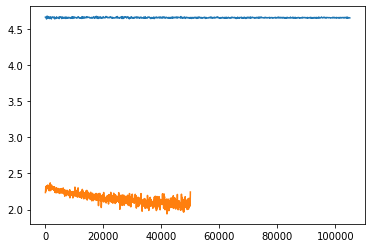

In [4]:
print('-'*50, 'pretraining', '-'*50)
train_loader_random_lebels = dead_leaves_squares_pretraining_gray()

model = Net(105)
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses, val_losses, exemplers = train(model, optimizer, train_loader_random_lebels)
plt.plot(exemplers, train_losses)

save_pruned_model(model, "pretrained_dead_leaves_squares_gray_withoutlast.pt")

newModel = Net(10)
optimizer = optim.SGD(newModel.parameters(), lr=0.1)
newModel.load_state_dict(torch.load("pretrained_dead_leaves_squares_gray_withoutlast.pt"), strict=False)

for idx, child in enumerate(newModel.children()):
    if idx == len(list(newModel.children())) - 1:
        break
    for param in child.parameters():
        param.requires_grad = False

print('-'*50, 'training only last layer', '-'*50)
train_loader, val_loader, test_loader = MNIST()

train_losses, val_losses, exemplers = train(newModel, optimizer, train_loader)
plt.plot(exemplers, train_losses)
test(newModel, test_loader)